# TensorFlow Installation

- pip install tensorflow

# Keras instalation

- pip install numpy scipy
- pip install scikit-learn
- pip install pillow
- pip install h5py
- pip install keras

Required libraries

In [18]:
import keras
from keras import layers
from keras import models
from keras import optimizers
from keras import backend as k
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

from IPython.display import Image

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random
import sys

Important links:
- https://arxiv.org/pdf/1710.07557.pdf
- https://artificialintelligence.fun/convolutional-neural-networks-genetic-algorithms-and-emotion-recognition/
- https://www.kaggle.com/ashishpatel26/tutorial-facial-expression-classification-keras
- 

Load data and reshape it

Dataset available at: https://www.kaggle.com/ashishpatel26/fer2018#fer20131.csv

In [20]:
# dataset loading
ds = pd.read_csv("datasets/fer20131.csv")
print("Dataset shape: " + str(ds.shape))
ds.head(5)

Dataset shape: (35887, 3)


,emotion,pixels,Usage
0,Angry,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,Angry,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,Fear,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,Sad,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,Neutral,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


### Analize classes to classify


-> Classes: ['Angry' 'Fear' 'Sad' 'Neutral' 'Happy' 'Surprise']


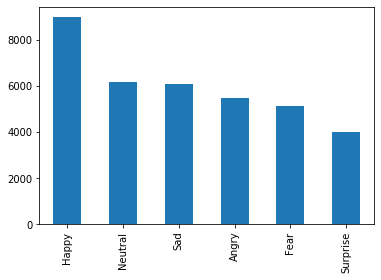

In [21]:
# show classes
ds['emotion'].value_counts().plot.bar()


# replace literal labels for numeric
classes = {'Angry': 0, 'Fear': 1, 'Happy': 2, 'Sad': 3, 'Surprise': 4, 'Neutral': 5}
ds_ = ds.applymap(lambda s: classes.get(s) if s in classes else s)

print ("\n" + "-> Classes: " + str(ds['emotion'].unique()))

In [22]:
ds_.head(5)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,1,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,3,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,5,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


### Training and Test datasets

In [92]:
# Returns input (X) and respective labels (Y) from dataset
def get_in_out_data(dataset):
    x = list(dataset["pixels"])
    X = []
    
    for i in range(len(x)):
        each_pixel = [int(num) for num in x[i].split()]
        X.append(each_pixel)
        
    X = np.array(X)
    X = X.reshape(X.shape[0], 48, 48,1)  # reshape to a 48x48 grayscale (1 pixel) format
    X = X.astype("float32")
    X /= 255 # normalize
    
    Y = dataset.emotion.values
    Y = np_utils.to_categorical(Y)
    
    return X,Y

In [24]:
# training set
train_ds = ds_[ds_.Usage == 'Training']
train_ds = train_ds.reset_index(drop=True)
x_train, y_train = get_in_out_data(train_ds)

# validation set
test_ds = ds_[ds_.Usage == 'Test']
test_ds = test_ds.reset_index(drop=True)
x_test, y_test = get_in_out_data(test_ds)

print("x_train: " + str(x_train.shape))
print("y_train: " + str(y_train.shape))
print("x_test:  " + str(x_test.shape))
print("y_test:  " + str(y_test.shape))

x_train: (28709, 48, 48, 1)
y_train: (28709, 6)
x_test:  (3589, 48, 48, 1)
y_test:  (3589, 6)


### Visualize some training images-labels

In [ ]:
emotion_classes = ['Angry', 'Fear', 'Happy','Sad', 'Surprise', 'Neutral']

fig = plt.figure(figsize=(20,15))
for i in range(0, 100):
    input_img = x_train[i:(i+1),:,:,:]
    ax = fig.add_subplot(20,10,i+1)
    ax.imshow(input_img[0,:,:,0], cmap=plt.cm.gray)
    plt.title("Index: {0} - Emotion: {1}".format(str(train_ds.index.values[i]),emotion_classes[train_ds.emotion.values[i]]))
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.tight_layout()
plt.show()

## CNN Model

### Genetic Algorithm topology

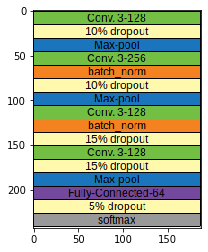

In [14]:
image = mpimg.imread('Figures/ga.png')
plt.imshow(image)

In [19]:
# GA (Genetic algorithm topology)
genAlgrthm_model = models.Sequential()
genAlgrthm_model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
genAlgrthm_model.add(layers.Dropout(0.10))
genAlgrthm_model.add(layers.MaxPooling2D(pool_size=(2, 2)))

genAlgrthm_model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
genAlgrthm_model.add(layers.BatchNormalization())
genAlgrthm_model.add(layers.Dropout(0.10))
genAlgrthm_model.add(layers.MaxPooling2D(pool_size=(2, 2)))

genAlgrthm_model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
genAlgrthm_model.add(layers.BatchNormalization())
genAlgrthm_model.add(layers.Dropout(0.15))
genAlgrthm_model.add(layers.Conv2D(128, (3, 3), padding='same', activation='sigmoid'))
genAlgrthm_model.add(layers.Dropout(0.15))
genAlgrthm_model.add(layers.MaxPooling2D(pool_size=(2, 2)))


genAlgrthm_model.add(layers.Flatten())  
genAlgrthm_model.add(layers.Dense(64, activation='relu'))
genAlgrthm_model.add(layers.Dropout(0.05))
genAlgrthm_model.add(layers.Dense(6, activation='softmax'))

genAlgrthm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

genAlgrthm_model.summary()

W0823 09:12:13.113317 139718417782592 deprecation_wrapper.py:119] From /home/parisfe/miniconda3/envs/py3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0823 09:12:13.130955 139718417782592 deprecation_wrapper.py:119] From /home/parisfe/miniconda3/envs/py3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0823 09:12:13.133231 139718417782592 deprecation_wrapper.py:119] From /home/parisfe/miniconda3/envs/py3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0823 09:12:13.149762 139718417782592 deprecation_wrapper.py:119] From /home/parisfe/miniconda3/envs/py3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is d

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 128)       1280      
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 256)       295168    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 256)       1024      
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 256)       0         
__________

. Fit model

In [95]:
# train generators
train_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

train_datagen.fit(x_train)
train_gen = train_datagen.flow(x_train, y_train, batch_size=128)

# test generators
test_datagen = ImageDataGenerator(rescale=1./255)
test_datagen.fit(x_test)
test_gen = test_datagen.flow(x_test, y_test, batch_size=128)

# callback definitions
earlystop = EarlyStopping(patience=10)
callbacks = [earlystop]

total_train = train_ds.shape[0]
total_validate = test_ds.shape[0]

In [21]:
nb_epoch = 32
batch_size = 128

ga_model = genAlgrthm_model.fit(x_train,
                                y_train, 
                                callbacks=callbacks, 
                                nb_epoch=nb_epoch, 
                                batch_size=batch_size,
                                validation_data=(x_test, y_test), shuffle=True, verbose=1)

# save model
genAlgrthm_model.save('ga_model_v02.h5')

/home/parisfe/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':
W0823 09:12:23.771495 139718417782592 deprecation.py:323] From /home/parisfe/miniconda3/envs/py3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 28709 samples, validate on 3589 samples
Epoch 1/32
28709/28709 [==============================] - 668s 23ms/step - loss: 1.7856 - acc: 0.2645 - val_loss: 1.8041 - val_acc: 0.2627
Epoch 2/32
28709/28709 [==============================] - 660s 23ms/step - loss: 1.5270 - acc: 0.3648 - val_loss: 1.7704 - val_acc: 0.2561
Epoch 3/32
28709/28709 [==============================] - 647s 23ms/step - loss: 1.3946 - acc: 0.4084 - val_loss: 1.5984 - val_acc: 0.3636
Epoch 4/32
28709/28709 [==============================] - 647s 23ms/step - loss: 1.3423 - acc: 0.4220 - val_loss: 1.5138 - val_acc: 0.3812
Epoch 5/32
28709/28709 [==============================] - 646s 23ms/step - loss: 1.2960 - acc: 0.4378 - val_loss: 1.4560 - val_acc: 0.3853
Epoch 6/32
28709/28709 [==============================] - 648s 23ms/step - loss: 1.2611 - acc: 0.4570 - val_loss: 1.3313 - val_acc: 0.4528
Epoch 7/32
28709/28709 [==============================] - 649s 23ms/step - loss: 1.2310 - acc: 0.4690 - val_loss: 1.2

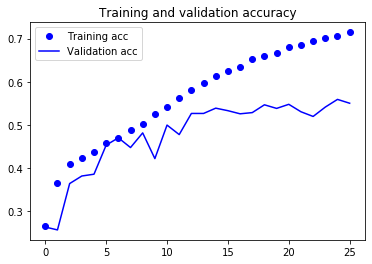

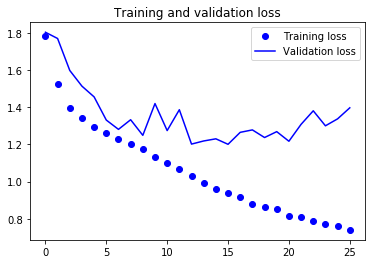

In [27]:
plotModelFitResults(ga_model)

In [28]:
# evaluate model
evaluateModel(genAlgrthm_model)

model acc: 55.00%


Since there are tons of similitudes between different facial emotions, the data set is going to be modified to have less classes 

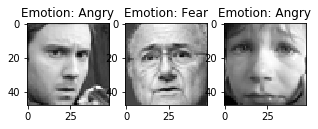

In [84]:
emotion_classes = ['Angry', 'Fear', 'Happy','Sad', 'Surprise', 'Neutral']

fig = plt.figure(figsize=(5,5))
input_img = x_train[0:7,:,:,:]
ax = fig.add_subplot(1,3,1)
ax.imshow(input_img[0,:,:,0], cmap=plt.cm.gray)
plt.title("Emotion: {0}".format(emotion_classes[train_ds.emotion.values[0]]))

input_img = x_train[5:7,:,:,:]
ax = fig.add_subplot(1,3,2)
ax.imshow(input_img[0,:,:,0], cmap=plt.cm.gray)
plt.title("Emotion: {0}".format(emotion_classes[train_ds.emotion.values[5]]))

input_img = x_train[6:7,:,:,:]
ax = fig.add_subplot(1,3,3)
ax.imshow(input_img[0,:,:,0], cmap=plt.cm.gray)
plt.title("Emotion: {0}".format(emotion_classes[train_ds.emotion.values[10]]))

plt.show()

Following modifications were applied:
- Replace 'Angry' and 'Fear' to 'Sad'
- Remove intances related to 'Surprise' classes since it introduces 'noise' to the model

In [89]:
# dataset loading
ds_ = pd.read_csv("datasets/fer20131_reduced.csv")
print("Dataset shape: " + str(ds_.shape))
ds_.head(5)

Dataset shape: (31885, 3)


,emotion,pixels,Usage
0,Sad,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,Sad,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,Sad,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,Sad,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,Neutral,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training



-> Classes: [0 2 1]


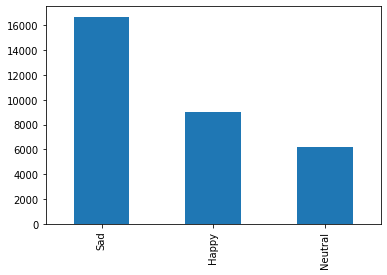

In [90]:
# show classes
ds_['emotion'].value_counts().plot.bar()


# replace literal labels for numeric
classes = {'Sad': 0, 'Happy': 1, 'Neutral': 2}
ds_ = ds_.applymap(lambda s: classes.get(s) if s in classes else s)

print ("\n" + "-> Classes: " + str(ds_['emotion'].unique()))

In [93]:
# training set
train_ds = ds_[ds_.Usage == 'Training']
train_ds = train_ds.reset_index(drop=True)
x_train, y_train = get_in_out_data(train_ds)

# validation set
test_ds = ds_[ds_.Usage == 'Test']
test_ds = test_ds.reset_index(drop=True)
x_test, y_test = get_in_out_data(test_ds)

print("x_train: " + str(x_train.shape))
print("y_train: " + str(y_train.shape))
print("x_test:  " + str(x_test.shape))
print("y_test:  " + str(y_test.shape))

x_train: (25538, 48, 48, 1)
y_train: (25538, 3)
x_test:  (3174, 48, 48, 1)
y_test:  (3174, 3)


In [96]:
# GA (Genetic algorithm topology), defined again to modfiy final softmax layer for 3 classes
genAlgrthm_model_3 = models.Sequential()
genAlgrthm_model_3.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
genAlgrthm_model_3.add(layers.Dropout(0.10))
genAlgrthm_model_3.add(layers.MaxPooling2D(pool_size=(2, 2)))

genAlgrthm_model_3.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
genAlgrthm_model_3.add(layers.BatchNormalization())
genAlgrthm_model_3.add(layers.Dropout(0.10))
genAlgrthm_model_3.add(layers.MaxPooling2D(pool_size=(2, 2)))

genAlgrthm_model_3.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
genAlgrthm_model_3.add(layers.BatchNormalization())
genAlgrthm_model_3.add(layers.Dropout(0.15))
genAlgrthm_model_3.add(layers.Conv2D(128, (3, 3), padding='same', activation='sigmoid'))
genAlgrthm_model_3.add(layers.Dropout(0.15))
genAlgrthm_model_3.add(layers.MaxPooling2D(pool_size=(2, 2)))


genAlgrthm_model_3.add(layers.Flatten())  
genAlgrthm_model_3.add(layers.Dense(64, activation='relu'))
genAlgrthm_model_3.add(layers.Dropout(0.05))
genAlgrthm_model_3.add(layers.Dense(3, activation='softmax'))

genAlgrthm_model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

genAlgrthm_model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 48, 48, 128)       1280      
_________________________________________________________________
dropout_6 (Dropout)          (None, 48, 48, 128)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 256)       295168    
_________________________________________________________________
batch_normalization_3 (Batch (None, 24, 24, 256)       1024      
_________________________________________________________________
dropout_7 (Dropout)          (None, 24, 24, 256)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 256)       0         
__________

In [ ]:
# generate model using new dataset with reduced classes
nb_epoch = 32
batch_size = 128

ga_model_3 = genAlgrthm_model_3.fit(x_train,
                                y_train, 
                                callbacks=callbacks, 
                                nb_epoch=nb_epoch, 
                                batch_size=batch_size,
                                validation_data=(x_test, y_test), shuffle=True, verbose=1)

# save model
genAlgrthm_model_3.save('ga_model_v03.h5')

/home/parisfe/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.
W0823 16:55:57.534647 140443365185344 deprecation.py:323] From /home/parisfe/miniconda3/envs/py3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 25538 samples, validate on 3174 samples
Epoch 1/32
25538/25538 [==============================] - 627s 25ms/step - loss: 1.0665 - acc: 0.5113 - val_loss: 1.0097 - val_acc: 0.5268
Epoch 2/32
25538/25538 [==============================] - 592s 23ms/step - loss: 0.9422 - acc: 0.5489 - val_loss: 0.9251 - val_acc: 0.5495
Epoch 3/32
25538/25538 [==============================] - 634s 25ms/step - loss: 0.8626 - acc: 0.6065 - val_loss: 0.9584 - val_acc: 0.5586
Epoch 4/32
25538/25538 [==============================] - 606s 24ms/step - loss: 0.7604 - acc: 0.6556 - val_loss: 0.8712 - val_acc: 0.5907
Epoch 5/32
25538/25538 [==============================] - 593s 23ms/step - loss: 0.6867 - acc: 0.6939 - val_loss: 0.8258 - val_acc: 0.6452
Epoch 6/32
25538/25538 [==============================] - 618s 24ms/step - loss: 0.6499 - acc: 0.7174 - val_loss: 0.7840 - val_acc: 0.6569
Epoch 7/32
  640/25538 [..............................] - ETA: 12:50 - loss: 0.6271 - acc: 0.7281

In [ ]:
plotModelFitResults(ga_model_3)

In [ ]:
# evaluate model
evaluateModel(genAlgrthm_model)

----------------------------------------------------------------------------

### Other model (adaptive network)

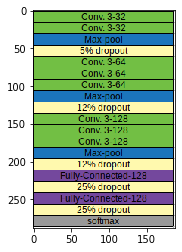

In [10]:
image = mpimg.imread('Figures/an.png')
plt.imshow(image)

In [45]:
# Adaptive Network model
adaptNet_model = models.Sequential()
adaptNet_model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
adaptNet_model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
adaptNet_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
adaptNet_model.add(layers.Dropout(0.05))

adaptNet_model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
adaptNet_model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
adaptNet_model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
adaptNet_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
adaptNet_model.add(layers.Dropout(0.12))

adaptNet_model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
adaptNet_model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
adaptNet_model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
adaptNet_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
adaptNet_model.add(layers.Dropout(0.12))

adaptNet_model.add(layers.Flatten())  
adaptNet_model.add(layers.Dense(128, activation='relu'))
adaptNet_model.add(layers.Dropout(0.25))
adaptNet_model.add(layers.Dense(128, activation='relu'))
adaptNet_model.add(layers.Dropout(0.25))
adaptNet_model.add(layers.Dense(6, activation='softmax'))

adaptNet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

adaptNet_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 24, 24, 64)        36928     
__________

Fit model

In [ ]:
nb_epoch = 32
batch_size = 128

adptNet_model = adaptNet_model.fit(x_train,
                                y_train, 
                                callbacks=callbacks, 
                                nb_epoch=nb_epoch, 
                                batch_size=batch_size,
                                validation_data=(x_test, y_test), shuffle=True, verbose=1)

# save model
adaptNet_model.save('adaptNet_model_v02.h5')

In [ ]:
plotModelFitResults(adptNet_model)

In [31]:
# evaluate model
evaluateModel(adaptNet_model)

model acc: 45.56%


In [26]:
def plotModelFitResults(model):
    acc = model.history['acc']
    val_acc = model.history['val_acc']
    loss = model.history['loss']
    val_loss = model.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

In [24]:
def evaluateModel(model):
    # evaluate model
    score = model.evaluate(x_test, y_test, verbose=0)
    print ("model %s: %.2f%%" % (model.metrics_names[1], score[1]*100))